# **Some exercises on relativistic kinematics using the pylorentz package**

Prepare the notebook with the preambles for the inclusion of pandas, numpy and matplotlib.pyplot:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the data file (csv format) into your Google Colab. Instead of mounting the "*/content/drive/MyDrive*" folder, there is an alternative way to download the data file to your Colab folder and access it directly. To do this,  install the **gdown** module of python, in the following way:

In [2]:
!pip install gdown

Then you import the full gdown package and you pick the file you need. The most difficult thing is to file the url address of the file, which can be done inquiring the properties of the file through the web gdrive interface.

In [3]:
!pip install gdown
import gdown

# now you use the url pointing to the data file
# the url is obtained from inquiring the file address in google drive

# real experimental data
# exp_nbarp-2pip1pim_93.csv
url = 'https://drive.google.com/uc?id=17J4rrO-NHL8whkd7hjELhJbCoanoaqam'


# real data
#path = '/content/drive/MyDrive/Colab - Exp Meth. Hadron Spec /Data Files/Spectroscopy/exp_nbarp-2pip1pim_93.csv'
# montecarlo data
# gen_nbarp-2pip1pim_93.csv
#url = 'https://drive.google.com/uc?id=1SarwF44sWSGbpn4PmBH3GLKIJJmN2lbS'

output = 'antineutron_3pi.dat'
gdown.download(url, output, quiet=False)
data = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1SarwF44sWSGbpn4PmBH3GLKIJJmN2lbS
To: /content/antineutron_3pi.dat
100%|██████████| 7.13M/7.13M [00:00<00:00, 97.3MB/s]


The file contains the 4-momenta of the particles of the reaction $\bar n p \rightarrow \pi^+_1\pi^+_2\pi^-_3$, the last column corresponds to the 3rd component of the antineutron momentum (up to 300 MeV/c), which travels along the $z$ axis

The columns headers present some trailing blanks, that must be dropped to be able to use correctly the DataFormat structure (if not, they deliver an error message). To do so, the *str.strip()* function must be used beforehand to reformat the column shape.
In the following commands in the cell, columns are shown, overall with the data.columns command, and per single variable (like *data.p2x*). If the format is correct, no error should appear.

In [4]:
data.columns = data.columns.str.strip()
data.head()

,p1x,p1y,p1z,E1,p2x,p2y,p2z,E2,p3x,p3y,p3z,E3,pnbar,
0,0.568076,-0.025414,0.319548,0.667044,-0.294767,-0.504221,0.130671,0.614557,-0.273310,0.529636,-0.173331,0.636188,0.276888,
1,-0.731877,0.369291,0.529725,0.985955,0.494900,-0.126568,-0.180145,0.559354,0.236977,-0.242723,-0.069600,0.373358,0.279979,
2,0.195390,-0.348397,-0.418754,0.595308,-0.247577,0.667814,0.648896,0.973558,0.052187,-0.319417,0.135126,0.377477,0.365269,
3,0.003046,-0.319060,0.048853,0.351673,-0.418747,0.779246,0.381658,0.973507,0.415700,-0.460187,-0.025654,0.636173,0.404857,
4,-0.179982,0.136545,-0.168787,0.314653,-0.323605,-0.690255,0.128157,0.785542,0.503587,0.553710,0.242888,0.799168,0.202258,


Load the **pylorentz package** (if not available, install it with *pip install pylorentz*).

The pylorentz package defines particle 4-momenta through the quantities

*   $E,\; \eta,\; \phi,\; p\;$ or
*   $E,\; \eta,\; \phi,\; p_T\;$
*   $E,\; m,\; \eta,\; \phi\;$
*   $m,\; \eta,\; \phi,\; p_T\;$
*   $m,\; \eta,\; \phi,\; p\;$

They are related to the cartesian coordinates of the particle 3-momentum through the following relationships:

> $p = \sqrt{p_x^2 + p_y^2 + p_z^2}$

> $p_T = \sqrt{p_x^2 + p_y^2}$

> $p_x = p_T\cos\phi = p\cos\phi\sin\theta$

> $p_y = p_T\sin\phi = p\sin\phi\sin\theta$

> $p_z = p_T\sinh\eta = p\cos\theta $

from which one can derive

> $\phi = \tan^{-1}(p_y/p_x)$

> $\theta = \cos^{-1}(p_z/p)$

> $\eta = -\ln(\tan(\theta/2)$

The pylorentz package provides functions for the evaluation of the magnitude of the 4-momentum vector, of the kinematic angles and their sum (which is convenient for particles systems).


  




In [5]:
! pip install pylorentz

  Preparing metadata (setup.py) ... done
  Created wheel for pylorentz: filename=pylorentz-0.3.3-py3-none-any.whl size=12084 sha256=90a4a30e69fae8f6c2dccbebaac9dcf7af525d0e55b35e251c664bdf3379afd9
  Stored in directory: /root/.cache/pip/wheels/ec/8c/e8/b87f17eae26931058525533e2641e351203f95110d94f985cc
Successfully built pylorentz


In [6]:
import math
from pylorentz import Momentum4

Let's import the arrays from the csv table into Momentum4 objects and repeat the calculation of invariant masses and other observables. We are working with *numpy arrays* whose length is equale to the number of entries of the table read from the csv file.

In [7]:
# final state
p1T = np.sqrt(data.p1x**2+data.p1y**2)
p1mod = np.sqrt(p1T**2 + data.p1z**2)
eta1 = np.arcsinh(data.p1z/p1T)
phi1 = np.arctan2(data.p1y, data.p1x)
pion1 = Momentum4.e_eta_phi_p(data.E1, eta1, phi1, p1mod)

p2T = np.sqrt(data.p2x**2+data.p2y**2)
p2mod = np.sqrt(p2T**2 + data.p2z**2)
eta2 = np.arcsinh(data.p2z/p2T)
phi2 = np.arctan2(data.p2y, data.p2x)
pion2 = Momentum4.e_eta_phi_p(data.E2, eta2, phi2, p2mod)

p3T = np.sqrt(data.p3x**2+data.p3y**2)
p3mod = np.sqrt(p3T**2 + data.p3z**2)
eta3 = np.arcsinh(data.p3z/p3T)
phi3 = np.arctan2(data.p3y, data.p3x)
pion3 = Momentum4.e_eta_phi_p(data.E3, eta3, phi3, p3mod)

# initial state
# len is the number of events read by the csv file
len = data.pnbar.size
pnbT = np.zeros(len)
pnbmod = data.pnbar
etanb = 1.e11*np.ones(len)
phinb = np.zeros(len)
massNeutron = 0.93956
Enb = np.sqrt(massNeutron**2 + pnbmod**2)
antineutron = Momentum4.e_eta_phi_p(Enb, etanb, phinb, pnbmod)

# the target (proton) is at rest
massProton = 0.93827
ETgt = massProton*np.ones(len)
etaTgt = np.zeros(len)
phiTgt = np.zeros(len)
pTgt = np.zeros(len)
protonTarget =  Momentum4.e_eta_phi_p(ETgt, etaTgt, phiTgt, pTgt)

In [8]:
system12 = pion1+pion2
system23 = pion2+pion3
system13 = pion1+pion3

invariantMassSquared12 = system12.m2
invariantMassSquared13 = system13.m2
invariantMassSquared23 = system23.m2


Let's plot the Dalitz Plots using the new Momentum4 objects. As in the first exercise let's plot the antineutron momentum to see how the distribution looks like.

Text(0.5, 1.0, 'The histogram of the momentum of the incoming antineutron \n')

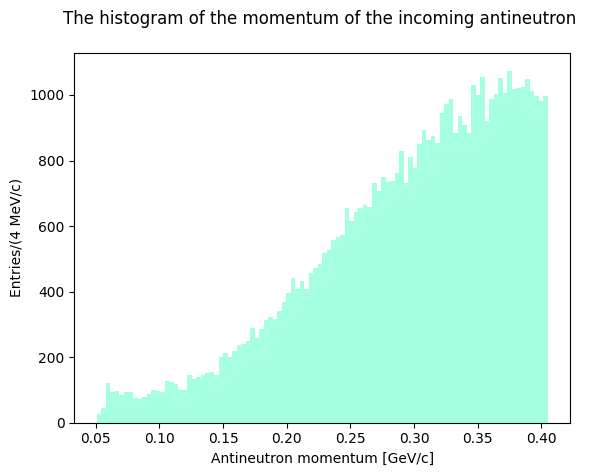

In [9]:
plt.hist(antineutron.p, bins=100, color='aquamarine', alpha = 0.7)
plt.xlabel('Antineutron momentum [GeV/c]')
plt.ylabel('Entries/(4 MeV/c)')
plt.title('The histogram of the momentum of the incoming antineutron \n')

And now let's plot the two Dalitz plots with the square invariant masses of the pion pairs:

Text(0, 0.5, 'i.m.$^2(\\pi^+_2\\pi^-$) [GeV$^2$]')

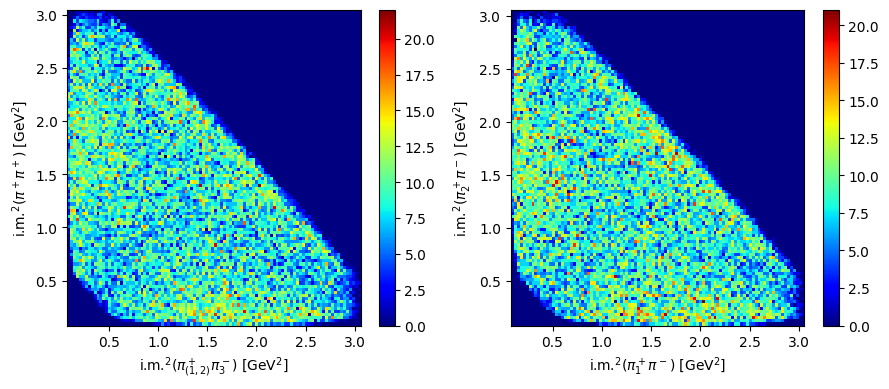

In [10]:
fig, ax = plt.subplots(1,2, tight_layout=True, figsize=(9,4))
h0 = ax[0].hist2d(invariantMassSquared13, invariantMassSquared12, bins=100, cmap='jet')
h0 = ax[0].hist2d(invariantMassSquared23, invariantMassSquared12, bins=100, cmap='jet')
fig.colorbar(h0[3], ax=ax[0])
ax[0].set_xlabel('i.m.$^2(\pi^+_{(1,2)}\pi^-_{3}$) [GeV$^2$]')
ax[0].set_ylabel('i.m.$^2(\pi^+\pi^+$) [GeV$^2$]')
h1 = ax[1].hist2d(invariantMassSquared13, invariantMassSquared23, bins=100, cmap='jet')
h1 = ax[1].hist2d(invariantMassSquared23, invariantMassSquared13, bins=100, cmap='jet')
fig.colorbar(h1[3], ax=ax[1])
ax[1].set_xlabel('i.m.$^2(\pi^+_1\pi^-$) [GeV$^2$]')
ax[1].set_ylabel('i.m.$^2(\pi^+_2\pi^-$) [GeV$^2$]')

Let's transform the 4-momenta of the particles, which are defined in the lab system, into the center-of-mass system exploiting the *boostparticle* function of pylorentz:

In [11]:
centerOfMass = antineutron + protonTarget

# to boost particles in the center of mass reference system, use the - sign
pion1CM = pion1.boost_particle(-centerOfMass)
pion2CM = pion2.boost_particle(-centerOfMass)
pion3CM = pion3.boost_particle(-centerOfMass)

In [12]:
antineutronCM = antineutron.boost_particle(-centerOfMass)

In [13]:
protonTargetCM = protonTarget.boost_particle(-centerOfMass)

Let's check whether the Mandelstam variables are indeed invariant in the different reference systems. Let's assume a two-body reaction $a + b\rightarrow c + d$ where in the final state two pions form a neutral dipion which recoils against the remaining $\pi^+_2$: $\bar n + p \rightarrow D(\pi^+_1\pi^-_3) + \pi^+_2$



> **total energy** $s = (p_a+p_b)^2 = (p_c + p_d)^2$



In [14]:
s_lab = centerOfMass.m2
print(s_lab)

[3.60121339 3.60286146 3.65479732 ... 3.62462028 3.58284872 3.62806796]


In [15]:
initCM = antineutronCM + protonTargetCM
s_cm = initCM.m2
print(s_cm)

s_lab-s_cm

[3.60121339 3.60286146 3.65479732 ... 3.62462028 3.58284872 3.62806796]


array([-4.4408921e-16,  4.4408921e-16,  8.8817842e-16, ...,
        8.8817842e-16,  0.0000000e+00, -4.4408921e-16])

Text(0.5, 1.0, 'Available energy for the reaction \n')

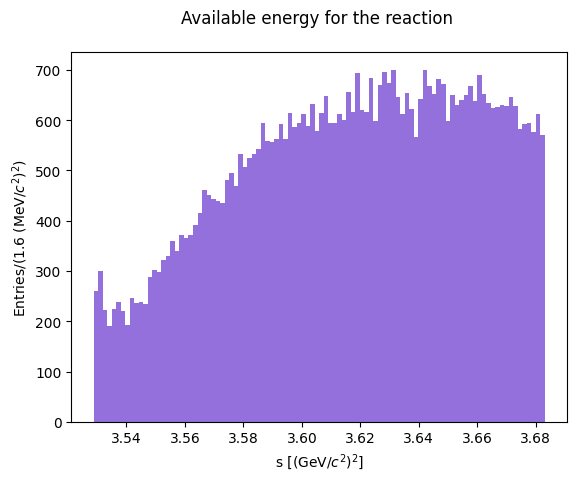

In [16]:
plt.hist(s_lab, bins=100, color='MediumPurple')
plt.xlabel('s [(GeV/$c^2)^2$]')
plt.ylabel('Entries/(1.6 (MeV/$c^2)^2$)')
plt.title('Available energy for the reaction \n')




> Momentum transfer $t = (p_a - p_c)^2 = (p_b - p_d)^2$





In [17]:
dipion = system13
t_lab_1 = (antineutron - dipion).m2
t_lab_2 = (protonTarget - pion2).m2
dipionCM = system13.boost_particle(-centerOfMass)
t_cm_1 = (antineutronCM - dipionCM).m2
t_cm_2 = (protonTargetCM - pion2CM).m2

Text(0.5, 0, 't = $(p_p - p_{\\pi^+_2})^2$ CM RF [$(\\mathrm{GeV}/c^2)^2$]')

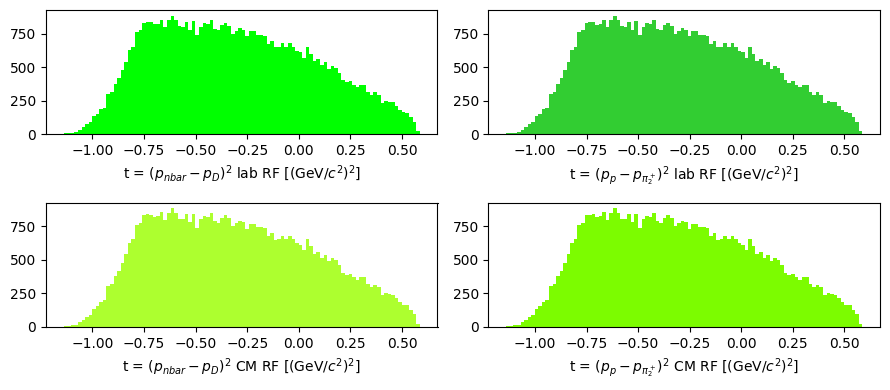

In [18]:
fig, ax = plt.subplots(2,2, tight_layout=True, figsize=(9,4))
ax[0,0].hist(t_lab_1, bins=100, color='Lime')
ax[0,0].set_xlabel('t = $(p_{nbar} - p_D)^2$ lab RF [$(\mathrm{GeV}/c^2)^2$]')
ax[0,1].hist(t_lab_2, bins=100, color='LimeGreen')
ax[0,1].set_xlabel('t = $(p_p - p_{\pi^+_2})^2$ lab RF [$(\mathrm{GeV}/c^2)^2$]')
ax[1,0].hist(t_cm_1, bins=100, color='GreenYellow')
ax[1,0].set_xlabel('t = $(p_{nbar} - p_D)^2$ CM RF [$(\mathrm{GeV}/c^2)^2$]')
ax[1,1].hist(t_cm_2, bins=100, color='LawnGreen')
ax[1,1].set_xlabel('t = $(p_p - p_{\pi^+_2})^2$ CM RF [$(\mathrm{GeV}/c^2)^2$]')

> $u = (p_a - p_d)^2 = (p_b - p_c)^2$


In [19]:
u_lab_1 = (antineutron - pion2).m2
u_lab_2 = (protonTarget - dipion).m2
u_cm_1 = (antineutronCM - pion2CM).m2
u_cm_2 = (protonTargetCM - dipionCM).m2

Text(0.5, 0, 'u = $(p_p - p_D)^2$ CM RF [$(\\mathrm{GeV}/c^2)^2$]')

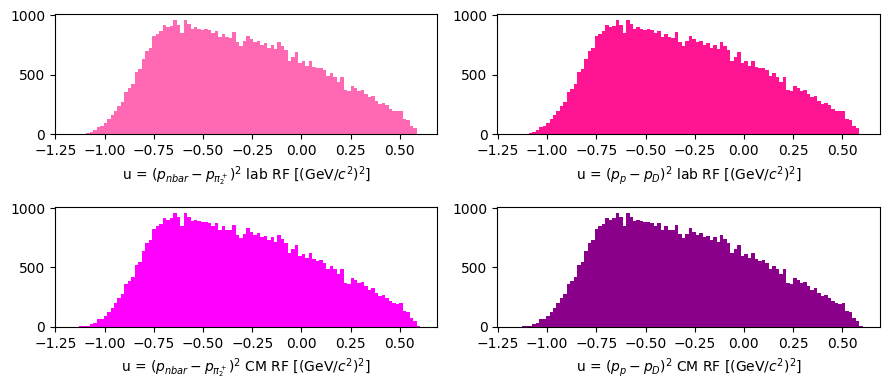

In [20]:
fig, ax = plt.subplots(2,2, tight_layout=True, figsize=(9,4))
ax[0,0].hist(u_lab_1, bins=100, color='HotPink')
ax[0,0].set_xlabel('u = $(p_{nbar} - p_{\pi^+_2})^2$ lab RF [$(\mathrm{GeV}/c^2)^2$]')
ax[0,1].hist(u_lab_2, bins=100, color='DeepPink')
ax[0,1].set_xlabel('u = $(p_p - p_D)^2$ lab RF [$(\mathrm{GeV}/c^2)^2$]')
ax[1,0].hist(u_cm_1, bins=100, color='Fuchsia')
ax[1,0].set_xlabel('u = $(p_{nbar} - p_{\pi^+_2})^2$ CM RF [$(\mathrm{GeV}/c^2)^2$]')
ax[1,1].hist(u_cm_2, bins=100, color='DarkMagenta')
ax[1,1].set_xlabel('u = $(p_p - p_D)^2$ CM RF [$(\mathrm{GeV}/c^2)^2$]')

Test: $\; s + t + u = m_1^2 + m_2^2 + m_3^2 + m_4^2$

In [21]:
sum = s_lab + t_lab_1 + u_lab_1

In [22]:
sumOfMasses = (massNeutron**2 + massProton**2 + dipionCM.m2 + pion2CM.m2)*np.ones(len)

(array([1.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 7.000e+00, 4.000e+00,
        7.000e+00, 5.000e+00, 8.000e+00, 1.200e+01, 7.000e+00, 1.200e+01,
        1.300e+01, 2.300e+01, 1.300e+01, 1.500e+01, 1.300e+01, 1.700e+01,
        1.500e+01, 1.800e+01, 1.300e+01, 1.600e+01, 1.700e+01, 1.700e+01,
        1.800e+01, 1.300e+01, 1.500e+01, 2.400e+01, 2.000e+01, 1.700e+01,
        1.400e+01, 2.100e+01, 9.000e+00, 1.200e+01, 2.000e+01, 1.800e+01,
        2.400e+01, 3.900e+01, 9.400e+01, 1.620e+02, 3.230e+02, 5.800e+02,
        8.480e+02, 1.345e+03, 1.834e+03, 2.396e+03, 3.012e+03, 3.586e+03,
        4.111e+03, 4.345e+03, 4.473e+03, 4.582e+03, 4.245e+03, 3.834e+03,
        3.287e+03, 2.580e+03, 2.079e+03, 1.477e+03, 1.057e+03, 6.970e+02,
        3.950e+02, 1.880e+02, 9.300e+01, 3.900e+01, 2.500e+01, 2.300e+01,
        2.000e+01, 2.100e+01, 1.500e+01, 2.200e+01, 1.900e+01, 1.900e+01,
        1.700e+01, 1.100e+01, 1.800e+01, 2.500e+01, 2.600e+01, 1.500e+01,
        1.300e+01, 2.500e+01, 1.500e+0

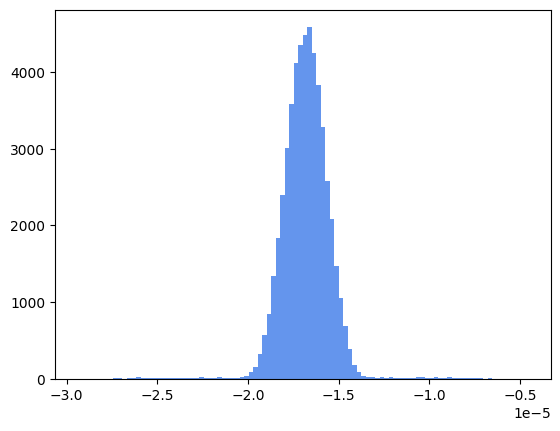

In [23]:
plt.hist(sum-sumOfMasses, bins=100, color='CornFlowerBlue')

Another interesting quantity to be observed is the **missing mass**. It can be evaluated comparing the total energies between the initial and the final state of a reaction, or, given a final state, evaluating the missing energy recoiling against a system of particles. In any case, the missing mass quantity is defined as the modulus of the 4-momentum corresponing to the difference of the 4-momenta of the involved particles.

In [24]:
# missing mass between initial and final state
initialState4Mom = centerOfMass
finalState4Mom = pion1 + pion2 + pion3
missing4Momentum = initialState4Mom - finalState4Mom
# missing mass recoiling against the neutral dipion systems (there are two)
dipion1 = pion1 + pion3
dipion2 = pion2 + pion3
recoilingMissingMass1 = finalState4Mom - dipion1
recoilingMissingMass2 = finalState4Mom - dipion2

Let's plot the missing mass of the reaction, the scatter plot of total momentum versus total energy of the measured particles in the final state (it should be close to zero), and the missing mass recoiling against the neutral dipion (it should be close to the mass of a pion, for a correctly selected exclusive reaction).

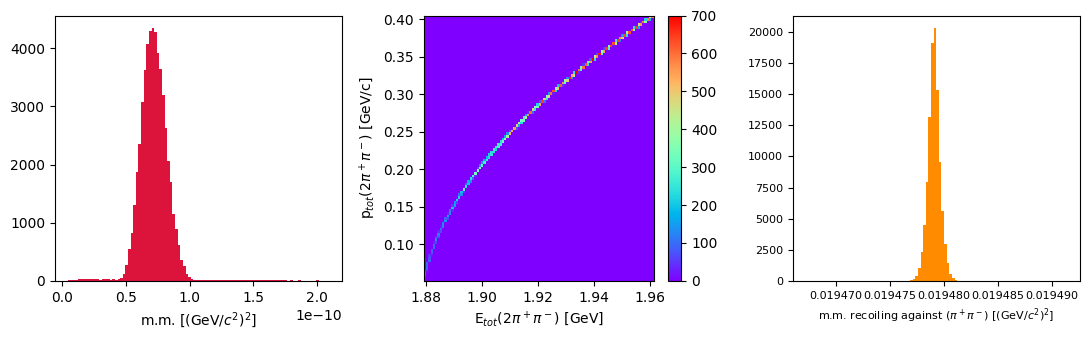

In [25]:
fig, ax = plt.subplots(1,3, tight_layout=True, figsize=(11,3.5))
ax[0].hist(missing4Momentum.m2, bins=100, color='crimson')
ax[0].set_xlabel('m.m. [$(\mathrm{GeV}/c^2)^2$]')
# ptot vs Etot plot
h1 = ax[1].hist2d(finalState4Mom.e, finalState4Mom.p, bins=100, cmap='rainbow')
fig.colorbar(h1[3], ax=ax[1])
ax[1].set_xlabel('$\mathrm{E}_{tot}(2\pi^+\pi^-)$ [GeV]')
ax[1].set_ylabel('$\mathrm{p}_{tot}(2\pi^+\pi^-)$ [GeV/c]')
# missing mass recoiling against the neutral dipion (2 entries/event)
allMissingDipion = np.concatenate([recoilingMissingMass1.m2, recoilingMissingMass2.m2])
missingHisto = ax[2].hist(allMissingDipion, bins=100, color='darkorange')
ax[2].set_xlabel('m.m. recoiling against $(\pi^+\pi^-)$ [$(\mathrm{GeV}/c^2)^2$]')
ax[2].xaxis.get_label().set_fontsize(8)
ax[2].tick_params(axis='both', which='major', labelsize=8)

Let's fit the last plot with a gaussian function to check if the missing particle is really a charged pion (mass: 0.140 GeV/$c^2$).

The missing mass in GeV/c^2 is:  0.13956752494676397


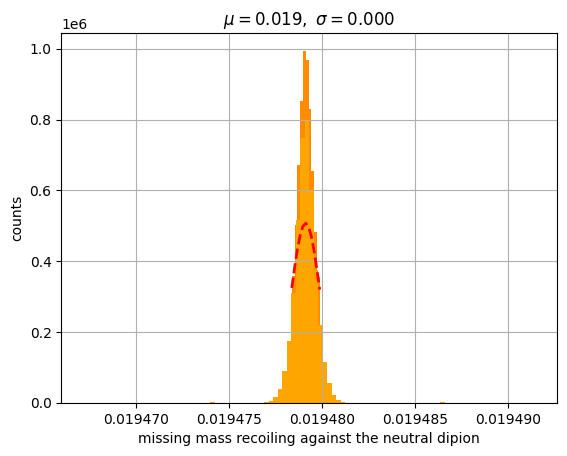

In [26]:
from scipy.stats import norm
import matplotlib.mlab as mlab

# best fit of data
(mu, sigma) = norm.fit(allMissingDipion)

# the histogram of the data
n, bins, patches = plt.hist(allMissingDipion, range=(0.01947835, 0.01947985), density=True, facecolor='darkorange', histtype='barstacked')

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('missing mass recoiling against the neutral dipion')
plt.ylabel('counts')
plt.title(r'$\mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)
plt.hist(allMissingDipion, 100, density=True, facecolor='orange', histtype='barstacked')

print("The missing mass in GeV/c^2 is: ", np.sqrt(mu))